In [1]:
import numpy as np
import matplotlib.pyplot as plt
import helpers
import os
import scipy

In [2]:
data_dir = 'new_all_data/'

## Checking for anomalous bout duration and rate datasets

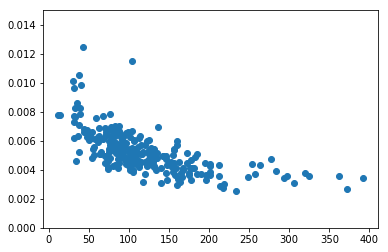

In [3]:
reload(helpers)

x = []
y = []
filenames = []

for walker in os.walk(data_dir):
    path = walker[0] + '/'
    filelist = walker[2]
    
    if len(filelist) == 0:
        continue
    
    for datafile in filelist:
        data = np.loadtxt(path + datafile,
                          delimiter = '\t',
                          usecols = (0,1,2,3,4))
        
        mean_dur = np.mean(data[:,0])
        mean_rate = np.mean(data[:,2])
        
        x.append(mean_dur)
        y.append(mean_rate)
        filenames.append(datafile)
        
foo = np.array([x, y, filenames]).T
        
fig, ax = plt.subplots(1)
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_ylim([0, 0.015])
ax.scatter(x,y)
plt.show()

In [4]:
print foo.shape

print sorted(foo, key=lambda x:x[1], reverse=False)[0]

(245, 3)
['233.647058824' '0.00257162251342'
 'saline_0.0_R_D_10_10_2015-11-23.B0110.CSV']


## Logistic regression parameters

## Long duration regression parameters

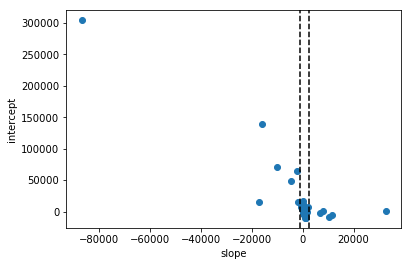

In [5]:
reload(helpers)

cutoff = 300

slopes = []
intercepts = []
filenames = []

fig, ax = plt.subplots(1)

for walker in os.walk(data_dir):
    path = walker[0] + '/'
    filelist = walker[2]
    
    if len(filelist) == 0:
        continue
    
    for datafile in filelist:
        x = []
        y = []
        
        data = np.loadtxt(path + datafile,
                          delimiter = '\t',
                          usecols = (0,1,2,3,4))
        
        for i in data:
            if i[3] > cutoff:
                x.append(i[4])
                y.append(i[3])
                
        slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x,y)
        
        slopes.append(slope)
        intercepts.append(intercept)
        filenames.append(datafile)
        
ax.scatter(slopes, intercepts)
ax.set_xlabel('slope')
ax.set_ylabel('intercept')

#ax.set_xlim([-20000, 20000])
#ax.set_ylim([-15000, 150000])

#ax.set_xlim([-5000, 5000])
#ax.set_ylim([-15000, 20000])

ax.axvline(-1000, c='k', ls='--')
ax.axvline(2500, c='k', ls='--')

plt.show()

In [6]:
print np.max(intercepts), filenames[np.argmax(intercepts)]
print np.min(intercepts), filenames[np.argmin(intercepts)]

print np.max(slopes), filenames[np.argmax(slopes)]
print np.min(slopes), filenames[np.argmin(slopes)]

304403.283408 LiCl_64.0_R_L_5_8_2014-10-17.B0105.CSV
-10066.7490048 saline_0.0_R_L_4_10_2015-11-23.B0104.CSV
32782.0461962 LiCl_64.0_R_L_9_8_2014-10-27.B0109.CSV
-87000.9457656 LiCl_64.0_R_L_5_8_2014-10-17.B0105.CSV


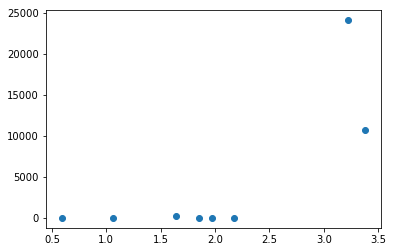

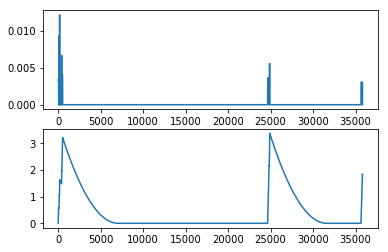

In [7]:
import plot_ts

def plot_l_pause(path, filename, ax):
    filepath = path + '/' + filename
    data = np.loadtxt(filepath, delimiter='\t', usecols=(0,1,2,3,4))
    ax.scatter(data[:,4], data[:,3])
    return ax

def plot_ts_from_file(path, filename):
    filepath = path + '/' + filename
    data = np.loadtxt(filepath, delimiter='\t', usecols=(0,1,2,3,4))
    plot_ts.ts_from_bouts(data)

filename = filenames[np.argmax(intercepts)]

path = filename.split('_')
path = '_'.join(path[0:4])
path = data_dir + path

fig, ax = plt.subplots(1)
ax = plot_l_pause(path, filename, ax)
plot_ts_from_file(path, filename)
plt.show()

## Delete files whose slope is too high or low

In [8]:
slope_max = 2500
slope_min = -1500

for i, slope in enumerate(slopes):
    if slope > slope_max:
        print filenames[i]
        
        filename = filenames[i]
        path = filename.split('_')
        path = '_'.join(path[0:4]) + '/'
        path = data_dir + path
        
        os.remove(path+filename)
        
    if slope < slope_min:
        print filenames[i]
        
        filename = filenames[i]
        path = filename.split('_')
        path = '_'.join(path[0:4]) + '/'
        path = data_dir + path
        
        os.remove(path+filename)

saline_0.0_R_L_1_8_2014-11-10.B0101.CSV
saline_0.0_R_L_5_8_2014-11-10.B0105.CSV
saline_0.0_R_L_12_8_2014-11-10.B0112.CSV
saline_0.0_R_L_13_8_2014-11-10.B0113.CSV
LiCl_64.0_R_L_5_8_2014-10-17.B0105.CSV
LiCl_64.0_R_L_9_8_2014-10-27.B0109.CSV
LiCl_32.0_R_L_8_8_2014-11-03.B0108.CSV
saline_0.0_A_L_14_10_2015-11-23.B0114.CSV
LiCl_16.0_R_L_7_8_2014-11-10.B0107.CSV
LiCl_16.0_R_L_10_8_2014-11-10.B0110.CSV
LiCl_16.0_R_L_3_8_2014-11-10.B0103.CSV
LiCl_16.0_R_L_6_8_2014-11-10.B0106.CSV
